torch.Size([5000, 100])
tensor(59450) 100
(59450,) (59450,)


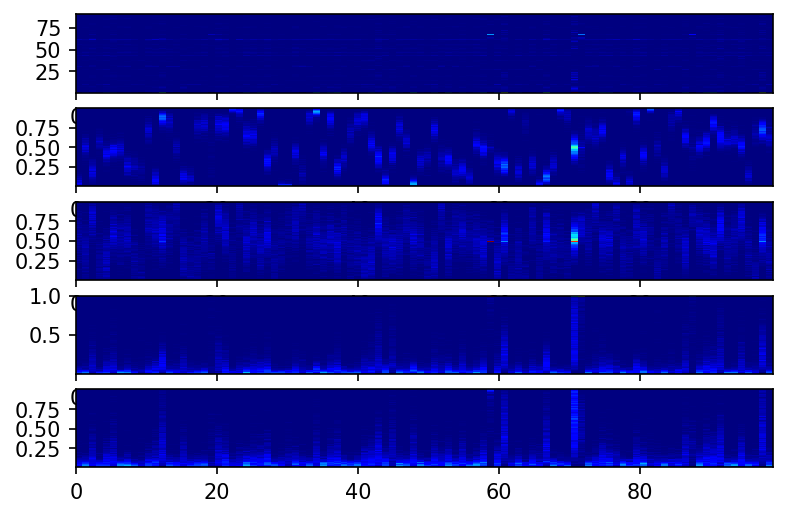

In [109]:
import torch
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


def scale_plot_size(factor=1.5):
    import matplotlib as mpl
    default_dpi = mpl.rcParamsDefault['figure.dpi']
    mpl.rcParams['figure.dpi'] = default_dpi*factor


def load_data():
    pred_logits = []
    pred_coords = []
    for idx in range(2500):
        outputs = torch.load(f"../output/outputs_{idx}.pth", map_location="cpu")
        pred_logits.append(outputs["outputs_class"])
        pred_coords.append(outputs["outputs_coord"])
    pred_logits = torch.cat(pred_logits, dim=0)
    _, pred_classes = pred_logits.max(dim=-1)
    print(pred_classes.size())
    fg_mask = pred_classes < pred_logits.size(-1) - 1
    print(fg_mask.sum(), pred_classes.size(-1))
    pred_classes = pred_classes[fg_mask].view(-1)

    pred_coords = torch.cat(pred_coords, dim=0)[fg_mask].view(-1, 4)

    query_indices = torch.arange(100, dtype=torch.float).view(1, 100).repeat(pred_logits.size(0), 1)[fg_mask].view(-1)

    return query_indices.numpy(), pred_classes.numpy(), pred_coords.numpy()


def vis_scatter():
    query_indices, pred_classes, pred_coords = load_data()
    print(query_indices.shape, pred_classes.shape)

    # plt.scatter(query_indices, pred_centers[..., 0])
    # plt.scatter(query_indices, pred_classes)
    x = query_indices
    y_0 = pred_coords[..., 0]
    y_1 = pred_coords[..., 1]
    z = pred_classes

    s_0 = pred_coords[..., 2]
    s_1 = pred_coords[..., 3]

    scale_plot_size()
    plt.subplot(5, 1, 1)
    plt.hist2d(x, z, (100, 100), cmap=plt.cm.jet)
    plt.subplot(5, 1, 2)
    plt.hist2d(x, y_0, (100, 100), cmap=plt.cm.jet)
    plt.subplot(5, 1, 3)
    plt.hist2d(x, y_1, (100, 100), cmap=plt.cm.jet)
    plt.subplot(5, 1, 4)
    plt.hist2d(x, s_0, (100, 100), cmap=plt.cm.jet)
    plt.subplot(5, 1, 5)
    plt.hist2d(x, s_1, (100, 100), cmap=plt.cm.jet)
    plt.show()
    

def vis_scatter_cls():
    query_indices, pred_classes, pred_coords = load_data()
    print(query_indices.shape, pred_classes.shape)

    # plt.scatter(query_indices, pred_centers[..., 0])
    # plt.scatter(query_indices, pred_classes)
    x = query_indices
    y = pred_classes


    scale_plot_size()
    plt.hist2d(x, y, (100, 100), cmap=plt.cm.jet)
    plt.show()


def vis_coords(query_idx):
    query_indices, pred_classes, pred_coords = load_data()
    print(query_indices.shape, pred_classes.shape)

    pred_centers = pred_coords[query_indices == query_idx][..., :2]
    x = pred_centers[..., 0]
    y = pred_centers[..., 1]

    plt.hist2d(x, y, (100, 100), cmap=plt.cm.jet)
    plt.show()


vis_scatter()
# vis_coords(20)